# Time Series Analysis in Python – A Comprehensive Guide with Examples

Source: https://www.machinelearningplus.com/time-series/time-series-analysis-python/

by Selva Prabhakaran

## 1. What is a Time Series

Time series is a sequence of observations recorded at regular time intervals.

## 2. How to import Time Series in Python?

In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [3]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


## 3. What is Panel Data?

Panel data is also a time based dataset.

The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods.

Typically, the columns present in panel data contain explanatory variables that can be helpful in predicting the Y, provided those columns will be available at the future forecasting period.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [5]:
df.loc[df['market'] == 'MUMBAI'].head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


## 4. Visualizing Time Series

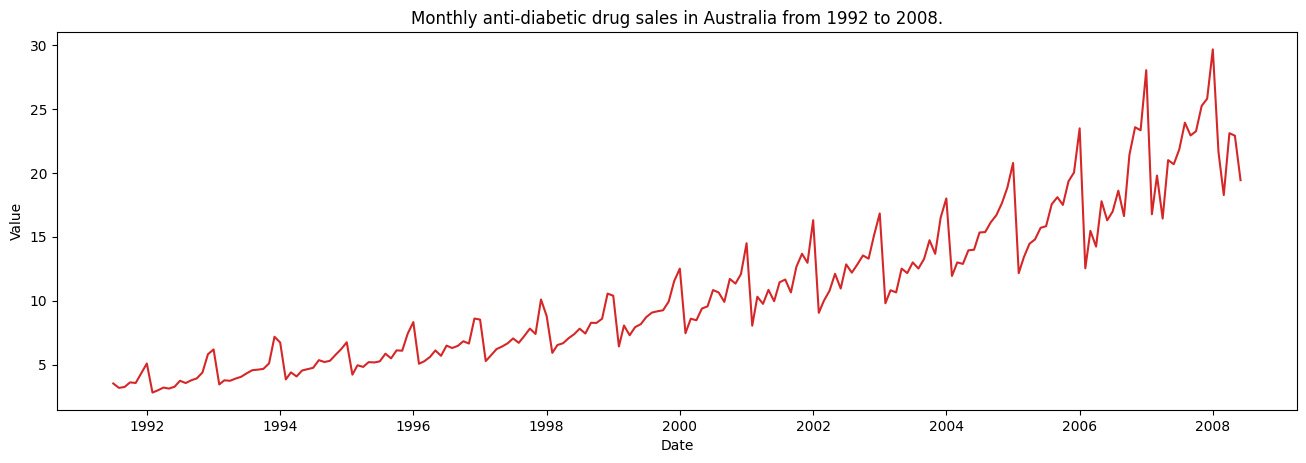

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw plot
def plot_df(df, x, y, title='', xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, df.index, df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

(204,)
(204,)


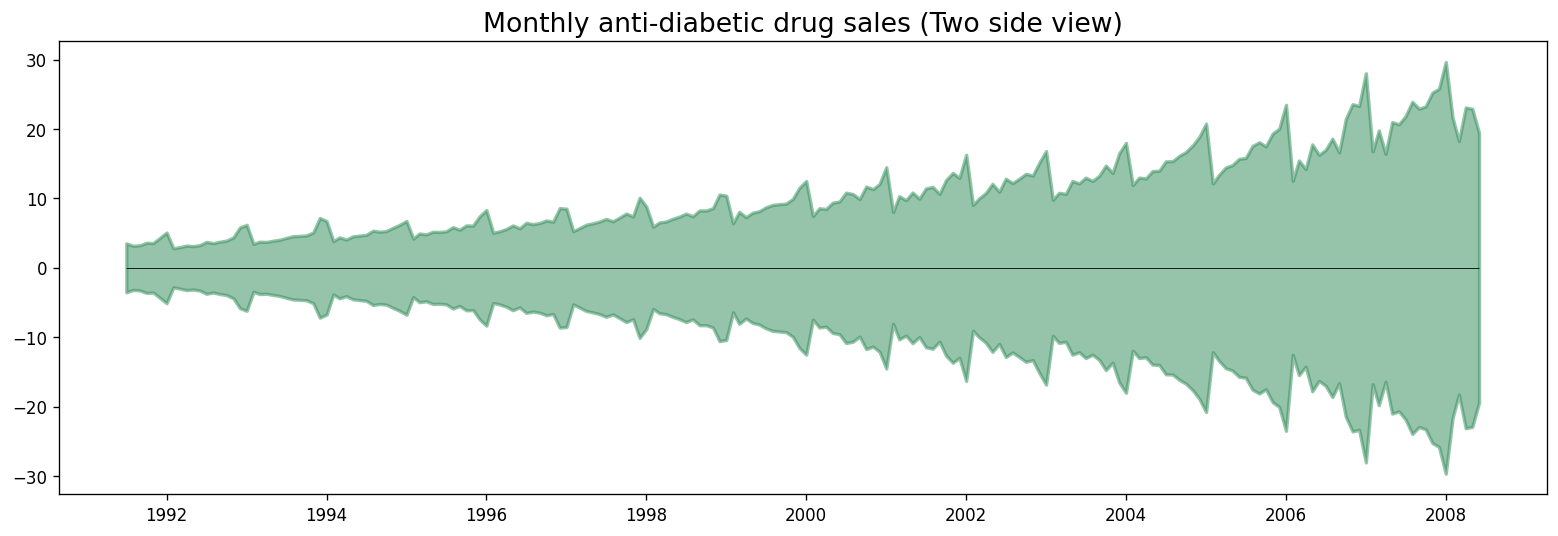

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
x = df.index
y = df.values.reshape(-1)

print(y.shape)
print(x.shape)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=120)
plt.fill_between(x, y1=y, y2=-y, alpha=0.5, linewidth=2, color='seagreen')
plt.title('Monthly anti-diabetic drug sales (Two side view)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=0.5)
plt.show()

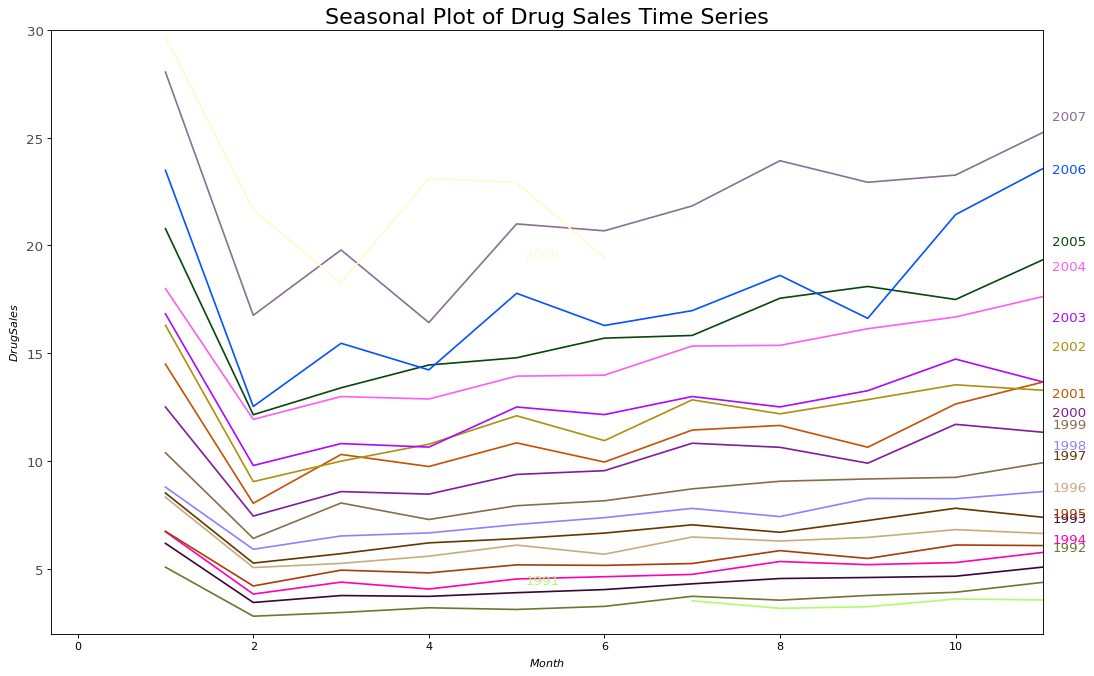

In [8]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# Prepare data
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
years = df['year'].unique()

# Prep colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), size=len(years))

# Draw plot
plt.figure(figsize=(16, 10), dpi=80)
for i, y in enumerate(years):
    plt.plot('month', 'value', data=df.loc[df.year == y, :], color=mycolors[i], label=y)
    plt.text(df.loc[df.year == y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

In [9]:
df.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,7
1,1991-08-01,3.180891,1991,8
2,1991-09-01,3.252221,1991,9
3,1991-10-01,3.611003,1991,10
4,1991-11-01,3.565869,1991,11


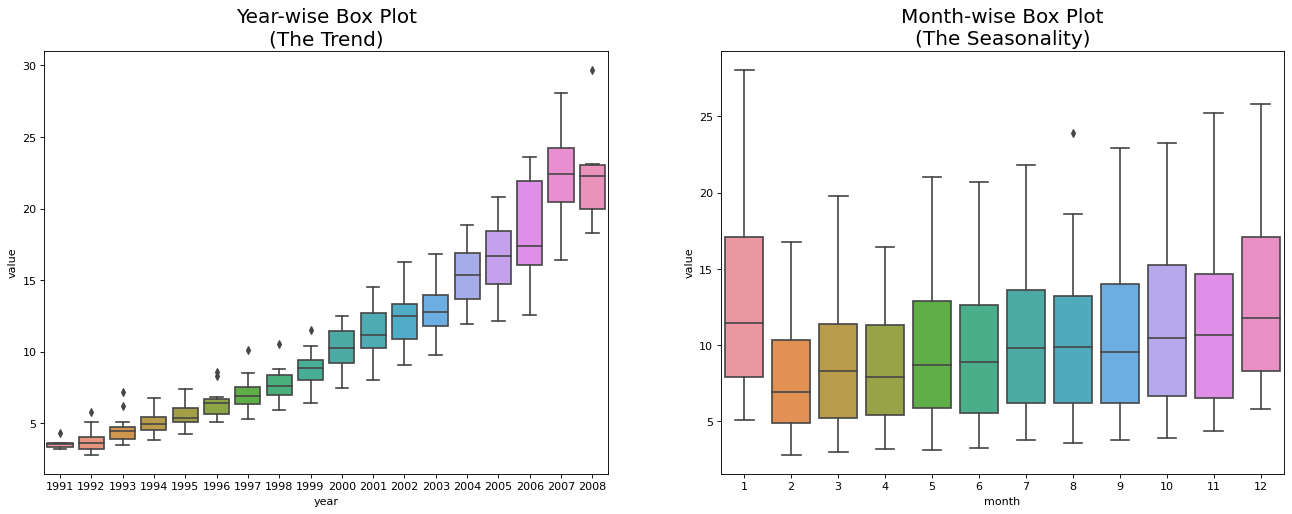

In [10]:
# Draw plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df[~df.year.isin([1991, 2008])], ax=axes[1])

# Set title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18);

## 5. Patterns in a Time Series

Any time series may be split into the following components: 

$Base Level + Trend + Seasonality + Error$



A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

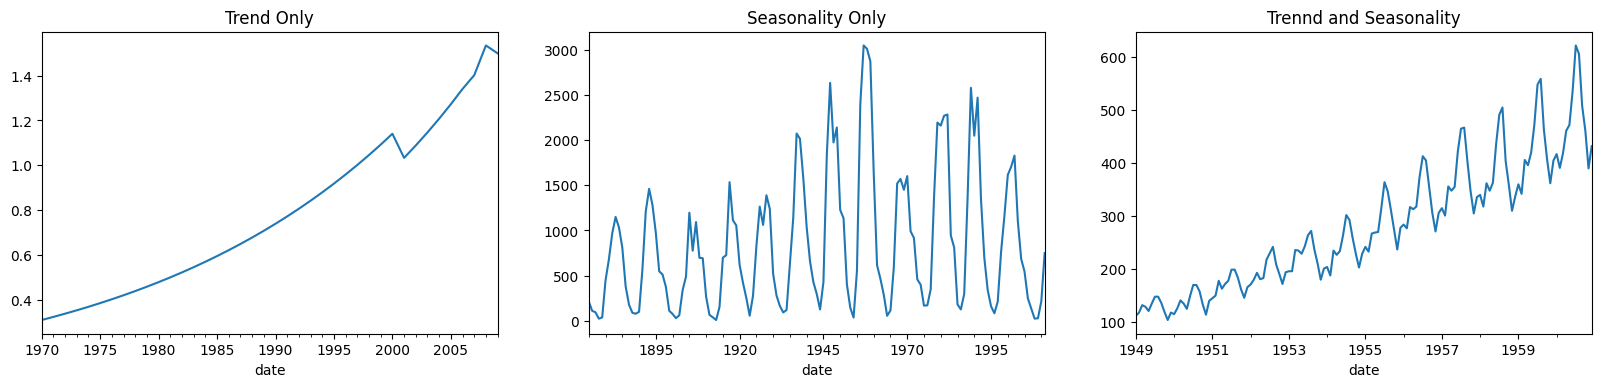

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), dpi=100)

df1 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date')
df2 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date')
df3 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date')

df1.plot(title='Trend Only', legend=False, ax=axes[0])
df2.plot(title='Seasonality Only', legend=False, ax=axes[1])
df3.plot(title='Trennd and Seasonality', legend=False, ax=axes[2]);

So, How to diffentiate between a ‘cyclic’ vs ‘seasonal’ pattern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

## 6. Additive and Multiplicative Time Series

Additive time series:

$Value = Base Level + Trend + Seasonality + Error$

Multiplicative time series:

$Value = Base Level \times Trend \times Seasonality \times Error$

## 7. How to Decompose a Time Series into Its Components?

You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

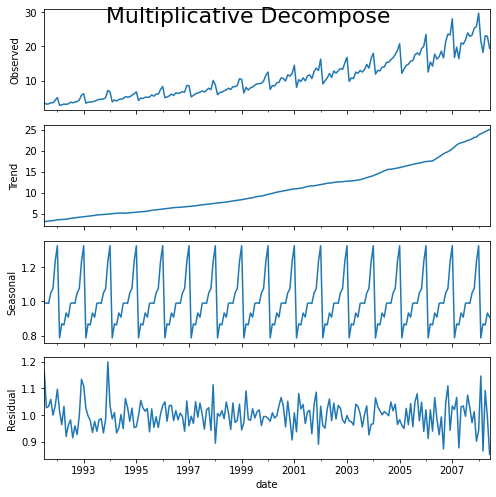

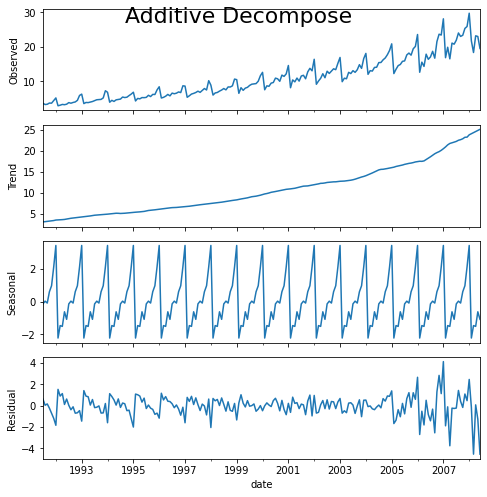

In [13]:
plt.rcParams.update({'figure.figsize': (7, 7)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22);

Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of the series.

In [14]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


## 8. Stationary and Non-Stationary Time Series

Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up.

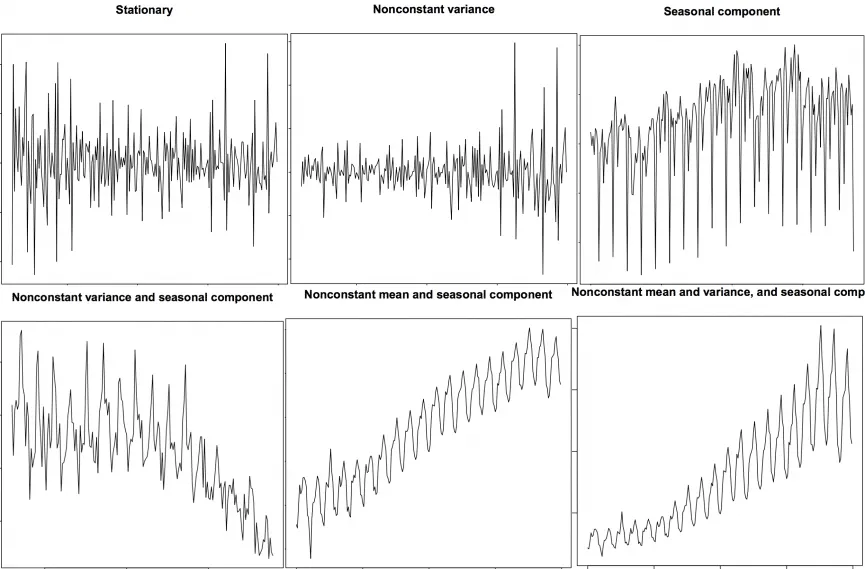

## 9. How to make a Time Series Stationary?

1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above

In simpler terms, differencing the series is nothing but subtracting the next value by the current value.

For example, consider the following series: [1, 5, 2, 12, 20]

First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

### Why make a non-stationary series stationary before forecasting?

Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

## 10. How to Test for Stationarity?

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

1. Augmented Dickey Fuller test (ADH Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3. Philips Perron test (PP Test)

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test.

In [18]:
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
for key, value in result[4].items():
    print('Critical Values:')
    print(f"    {key}, {value}\n")

# ADF Test
result = kpss(df.value.values, regression='c')
print(f"KPSS Statistic: {result[0]}")
print(f"p-value: {result[1]}")
for key, value in result[3].items():
    print('Critical Values:')
    print(f"    {key}, {value}")

ADF Statistic: 3.14518568930674
p-value: 1.0
Critical Values:
    1%, -3.465620397124192

Critical Values:
    5%, -2.8770397560752436

Critical Values:
    10%, -2.5750324547306476

KPSS Statistic: 1.3136750533447588
p-value: 0.01
Critical Values:
    10%, 0.347
Critical Values:
    5%, 0.463
Critical Values:
    2.5%, 0.574
Critical Values:
    1%, 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


## 11. What is the Difference Between White Noise and a Stationary Series?

Like a stationary series, the white noise is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0.

In white noise there is no pattern whatsoever. If you consider the sound signals in an FM radio as a time series, the blank sound you hear between the channels is white noise.

Mathematically, a sequence of completely random numbers with mean zero is a white noise.

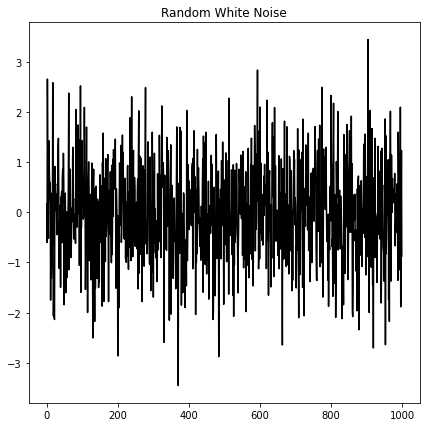

In [19]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k');

## 12. How to Detrend a Time Series?

Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.
2. Subtract the trend component obtained from time series decomposition we saw earlier.
3. Subtract the mean
4. Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

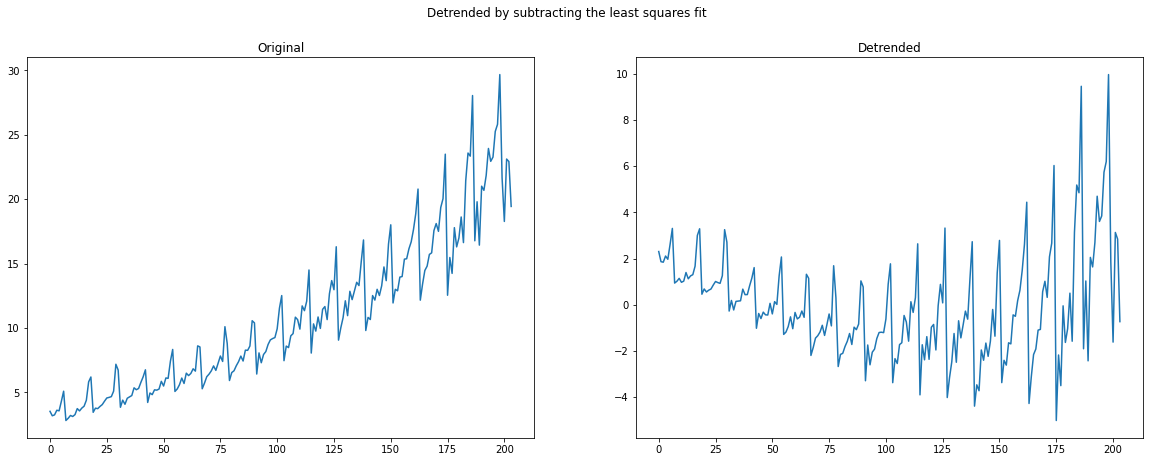

In [36]:
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].plot(df.value.values)
axes[0].set(title='Original')
axes[1].plot(detrended)
axes[1].set(title='Detrended')
fig.suptitle('Detrended by subtracting the least squares fit' );

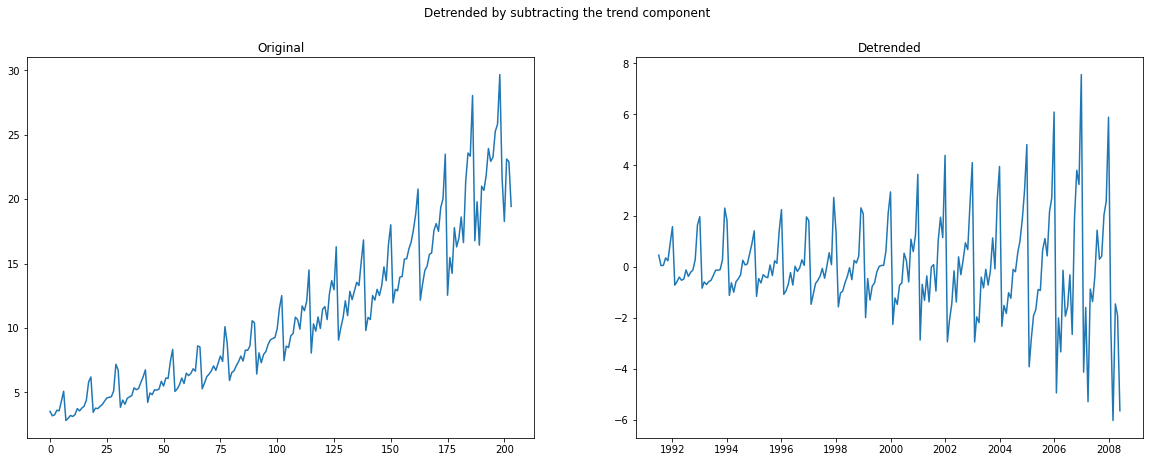

In [37]:
# Using statsmodels: Subtracting the trend component
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result = seasonal_decompose(x=df, model='multiplicative', extrapolate_trend='freq')
detrended = df.values - result.trend
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].plot(df.values)
axes[0].set(title='Original')
axes[1].plot(detrended)
axes[1].set(title='Detrended')
fig.suptitle('Detrended by subtracting the trend component');

## 13. How to Deseasonalize a Time Series?

1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.
2. Seasonal difference the series (subtract the value of previous season from the current value)
3. Divide the series by the seasonal index obtained from STL decomposition

If dividing by the seasonal index does not work well, try taking a log of the series and then do the deseasonalizing. You can later restore to the original scale by taking an exponential.

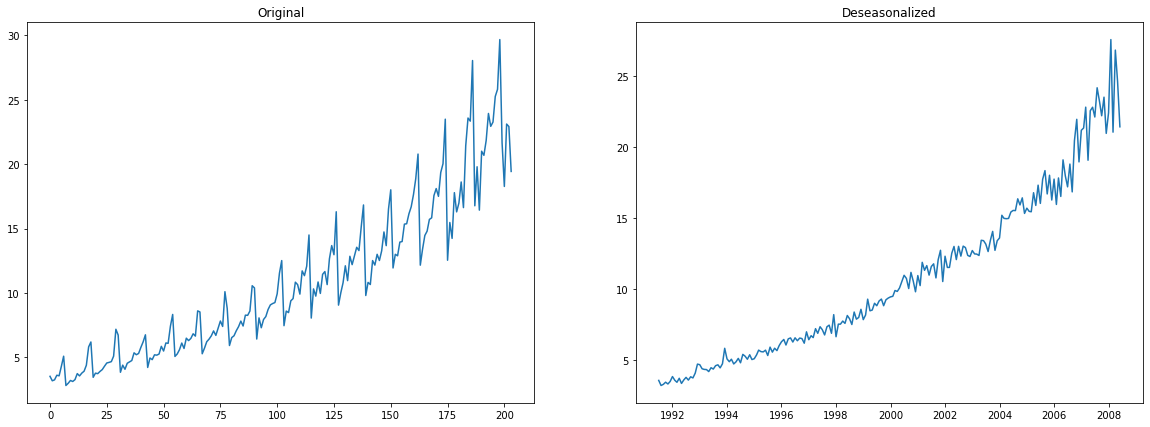

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq')
deseasonalized = df.values / result_mul.seasonal

fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].plot(df.values)
axes[0].set(title='Original')
axes[1].plot(deseasonalized)
axes[1].set(title='Deseasonalized');

## 14. How to Test for Seasonality of a Time Series?

The common way is to plot the series and check for repeatable patterns in fixed time intervals.

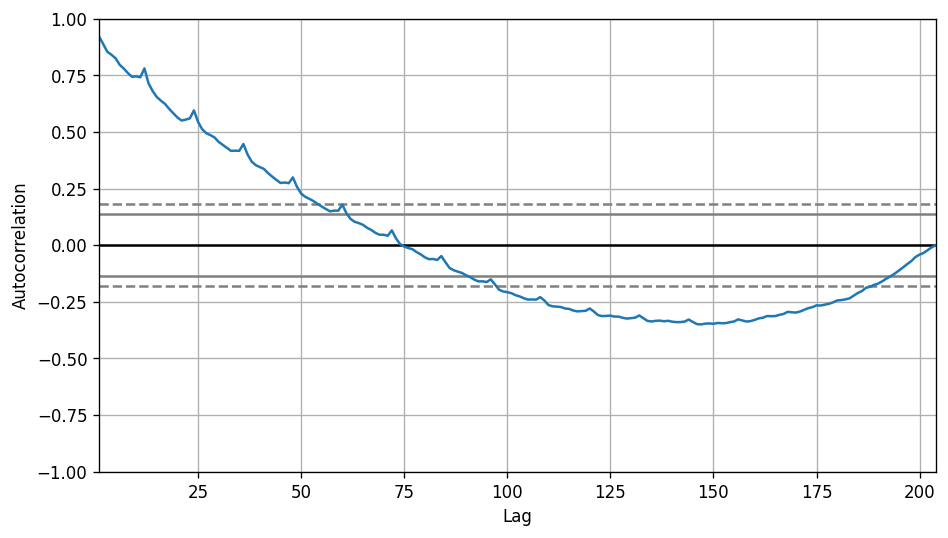

In [41]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

Alternately, if you want a statistical test, the CHTest can determine if seasonal differencing is required to stationarize the series.

## 15. How to Treat Missing Values in a Time Series?

However, depending on the nature of the series, you want to try out multiple approaches before concluding. Some effective alternatives to imputation are:
- Backward Fill
- Linear Interpolation
- Quadratic interpolation
- Mean of nearest neighbors
- Mean of seasonal couterparts

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: Mean of empty slice


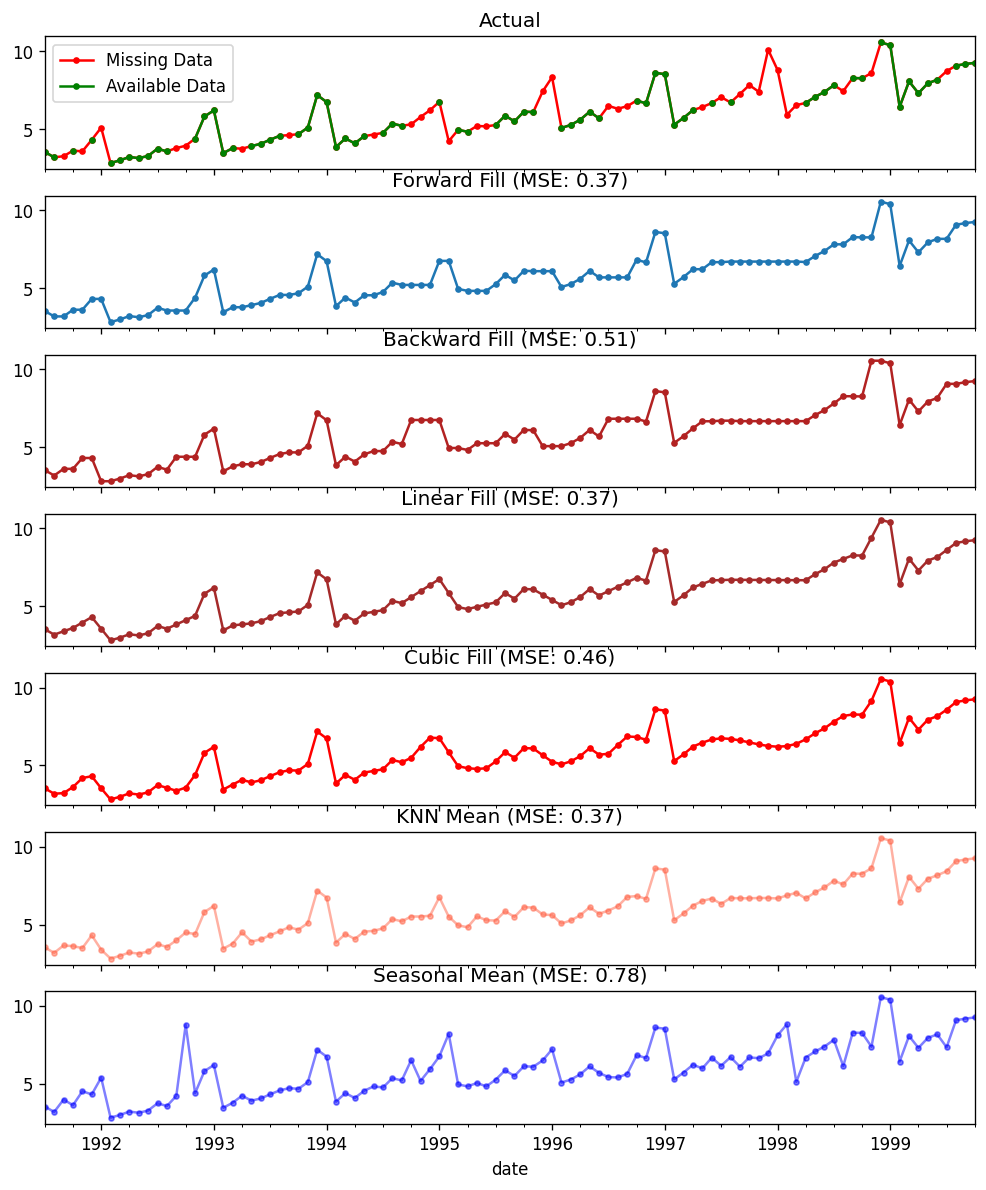

In [43]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

You could also consider the following approaches depending on how accurate you want the imputations to be.

1. If you have explanatory variables use a prediction model like the random forest or k-Nearest Neighbors to predict it.
2. If you have enough past observations, forecast the missing values.
3. If you have enough future observations, backcast the missing values
4. Forecast of counterparts from previous cycles.

## 16. What is Autocorrelation and Partial Autocorrelation Functions?

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


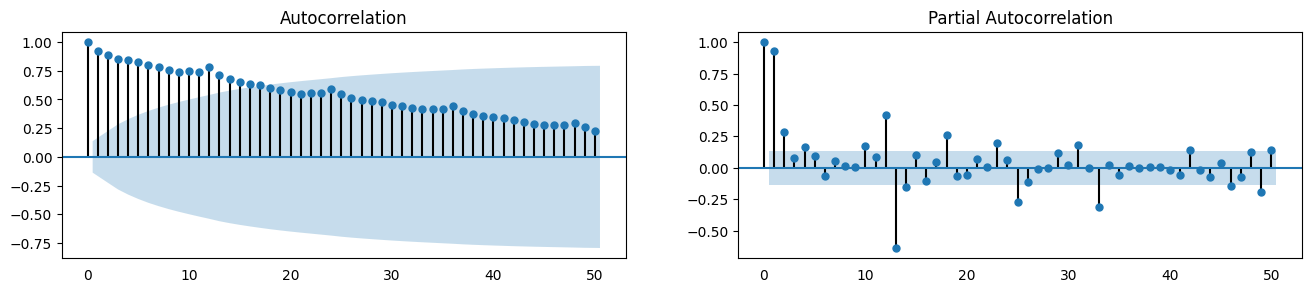

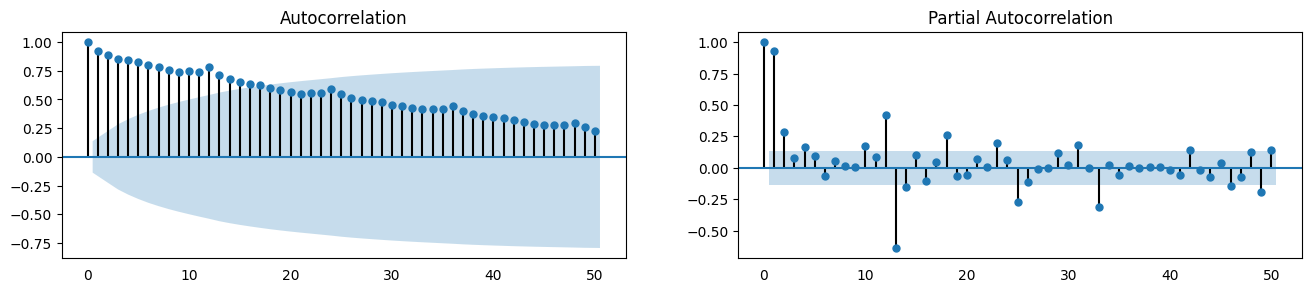

In [46]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
acf_50 = acf(df.value, nlags=50)
pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

## 17. How to Compute Partial Autocorrelation Function?

The partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

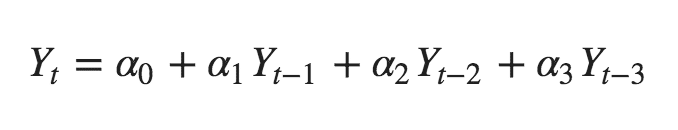

## 18. Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

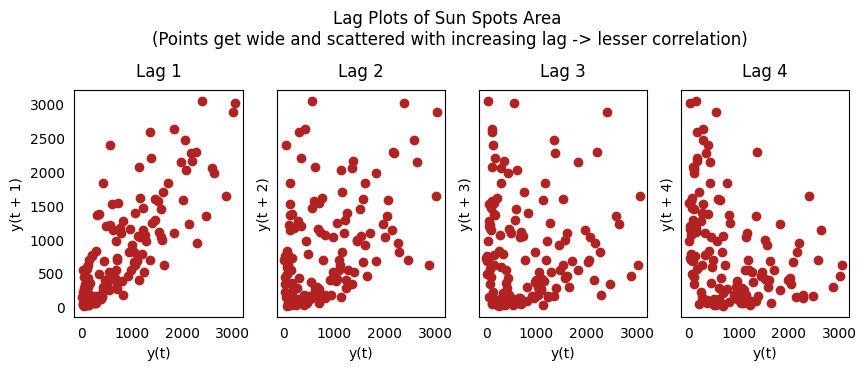

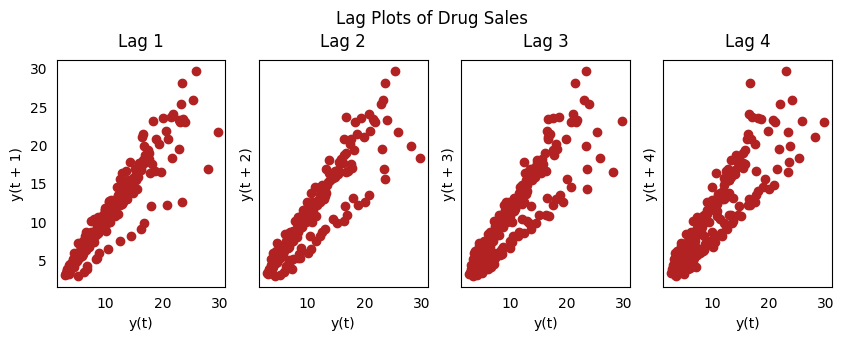

In [48]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05) ;

## 19. How to Estimate the Forecatability of a Time Series?

The more regular and repeatable patterns a time series has, the easier it is to forecase. The 'Approximate Entropy' can be used to quantify the regularity and unpredictability of fluctuations in a time series.

The higher the approximate entropy, the more difficult it is to forecast it. Another better alternate is the ‘Sample Entropy’.

Sample Entropy is similar to approximate entropy but is more consistent in estimating the complexity even for smaller time series. For example, a random time series with fewer data points can have a lower ‘approximate entropy’ than a more ‘regular’ time series, whereas, a longer random time series will have a higher ‘approximate entropy’.

In [49]:
# https://en.wikipedia.org/wiki/Approximate_entropy
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(ss.value, m=2, r=0.2*np.std(ss.value)))     # 0.651
print(ApEn(a10.value, m=2, r=0.2*np.std(a10.value)))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

0.6514704970333534
0.5374775224973489
0.12944610439759519
0.6352443356594248


In [50]:
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(ss.value, m=2, r=0.2*np.std(ss.value)))      # 0.78
print(SampEn(a10.value, m=2, r=0.2*np.std(a10.value)))    # 0.41
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

0.7853311366380039
0.41887013457621214
inf
2.1102132003465894


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


## 20. Why and How to Smoothen a Time Series?

- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better

So how to smoothen a series? Let’s discuss the following methods:

1. Take a moving average
2. Do a LOESS smoothing (Localized Regression)
3. Do a LOWESS smoothing (Locally Weighted Regression)

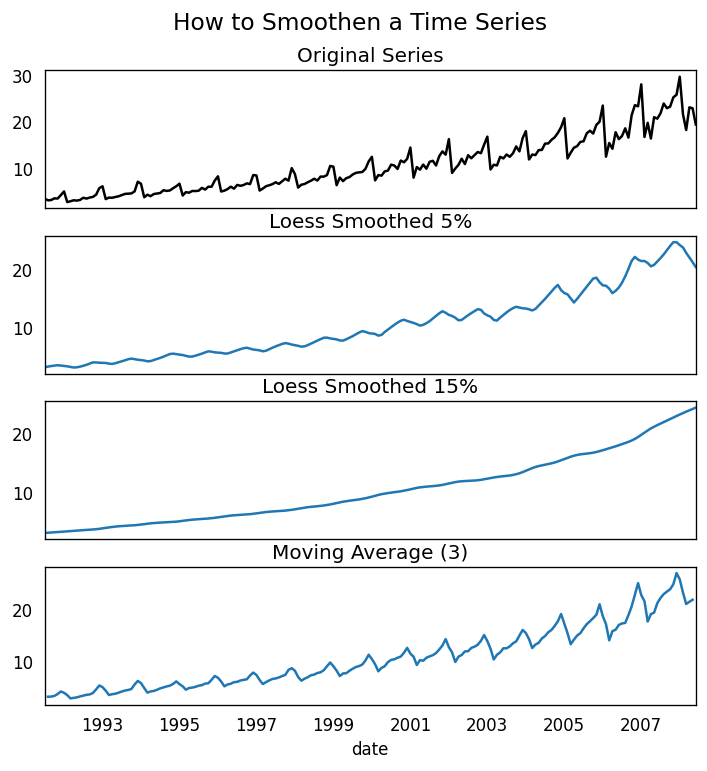

In [52]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

### How to use Granger Causality test to know if one time series is helpful in forecasting another?

Granger causality test is used to determine if one time series will be useful to forecast another.

How does Granger causality test work?

It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.

So, understand that Granger causality should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only.

It is nicely implemented in the statsmodel package.

It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X) is in the second column.

The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

The second argument maxlag says till how many lags of Y should be included in the test.

In [53]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df['month'] = df.date.dt.month
grangercausalitytests(df[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557335, 3.661425871353419e-12, 200.0, 1.0),
   'ssr_chi2test': (55.6013699581072, 8.876175235021508e-14, 1),
   'ssr_ftest': (54.7796748355736, 3.661425871353102e-12, 200.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (196.99559277182186, 1.6709003499116746e-43, 2),
   'params_ftest': (162.69891799873227, 1.9133235086857535e-42, 197.0, 2.0),
   'ssr_chi2test': (333.65666432227346, 3.5267600881280646e-73, 2),
   'ssr_ftest': (162.69891799873236, 1.9133235086857257e-42, 197.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}